This notebook contains code for testing out pretrained models: ResNet-152 and AlexNet for multi label classification task.

It is clear at the end how both models get correct predictions in terms of animal name but different predictions when it comes to animal breed.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

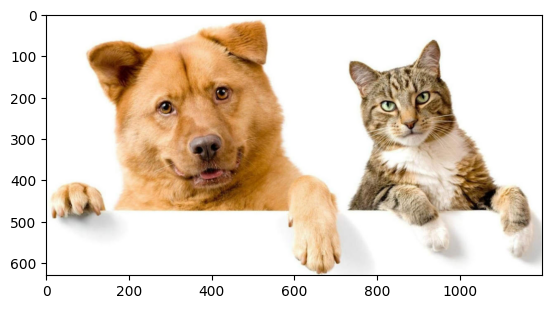

In [3]:
img = Image.open("dog-and-cat.jpg")

plt.imshow(img)

In [4]:
from torchvision import transforms

transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
img_t = transform(img)

print(img_t.shape)

torch.Size([3, 224, 224])


In [6]:
import torch

img_bt = torch.unsqueeze(img_t, 0)

print(img_bt.shape)

torch.Size([1, 3, 224, 224])


In [7]:
from torchvision import models

resnet = models.resnet152(pretrained=True)
resnet.eval()

out = resnet(img_bt)

c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to C:\Users\alshe/.cache\torch\hub\checkpoints\resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:35<00:00, 6.88MB/s] 


In [8]:
with open("imagenet1000Classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [10]:
_, indexes = torch.sort(out, descending=True) # Sort the predictions in descending order to get the top 5 predictions
percentage = torch.sigmoid(out)[0] * 100

[(labels[idx], percentage[idx].item()) for idx in indexes[0][:5]]

[("281: 'tabby, tabby cat',", 99.96380615234375),
 ("876: 'tub, vat',", 99.96285247802734),
 ("282: 'tiger cat',", 99.95922088623047),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 99.94329833984375),
 ("227: 'kelpie',", 99.94225311279297)]

In [11]:
# do the same thing with the AlexNet model
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

out = alexnet(img_bt)

_, indexes = torch.sort(out, descending=True) # Sort the predictions in descending order to get the top 5 predictions
percentage = torch.sigmoid(out)[0] * 100

[(labels[idx], percentage[idx].item()) for idx in indexes[0][:5]]

c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[("260: 'chow, chow chow',", 99.99767303466797),
 ("235: 'German shepherd, German shepherd dog, German police dog, alsatian',",
  99.9958724975586),
 ("274: 'dhole, Cuon alpinus',", 99.99418640136719),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 99.99358367919922),
 ("253: 'basenji',", 99.99314880371094)]